# 볼륨 마운트

**볼륨**
- 스토리지의 한 영역을 분할한 것 
- 하드디스크나 SSD를 분할한 하나의 영역

**마운트**
- 대상을 연결해 운영체제 또는 소프트웨어의 관리하에 두는 일 

**데이터 퍼시스턴시**
- 컨테이너는 생성 및 폐기가 매우 빈번하기 때문에 매번 데이터를 옮기는 대신 처음부터 컨테이너 외부에 둔 데이터에 접근해 사용하는 것이 일반적
- 데이터를 두는 장소가 마운트된 스토리지 영역

**스토리지 마운트**
- 볼륨 마운트
- 바인드 마운트

**볼륨 마운트**
- 도커 엔진이 관리하는 영역 내에 만들어진 볼륨을 컨테이너에 디스크 형태로 마운트
- 이름만으로 관리 가능
- 직접 조작하기 어려움
- 임시 목적의 사용이나 자주 쓰지는 않지만 지우면 안 되는 파일을 두는 목적으로 많이 사용
- 도커 컨테이너 경유해야 함 

**바인드 마운트**
- 도커가 설치된 컴퓨터의 문서 폴더 또는 바탕화면 폴더 등 도커 엔진에서 관리하지 않는 영역의 기존 디렉토리를 컨테이너에 마운트
- 디렉터리가 아닌 파일 단위로도 마운트 가능
- 자주 사용하는 파일을 두는 데 사용
- 기존과 동일한 방식으로 파일 사용 가능 

**두 가지 마운트 방식 차이점**
- 간단한지 복잡한지
- 호스트 컴퓨터에서 파일을 다룰 필요가 있는지
- 환경의 의존성을 배제해야 하는지 

**스토리지 마운트 절차**
1. 스토리지 영역을 생성
2. 컨테이너 생성 및 마운트

**볼륨 생성(볼륨 마운트) & 볼륨 삭제**
- docker volume create 볼륨_이름
- docker volume rm 볼륨_이름 

**스토리지 마운트 커맨드**
- 바인드 마운트
  - docker run (생략) -v 스토리지_실제_경로:컨테이너_마운트_경로 (생략)
- 볼륨 마운트
  - docker run (생략) -v 볼륨_이름:컨테이너_마운트_경로 (생략)

## 바인드 마운트 실습

In [ ]:
# apa_floder 폴더 생성 

# 아파치 컨테이너 실행
docker run --name apa000ex20 -d -p 8090:80 -v C:\Users\canmanmo\Documents\apa_folder:/usr/local/apache2/htdocs httpd

# 초기 화면 확인
http://localhost:8090
        
# 마운트된 폴더에 index.html 파일 배치

# index.html 파일 변경 확인 
http://localhost:8090
        
# 컨테이너 종료 및 삭제

### 성공 결과

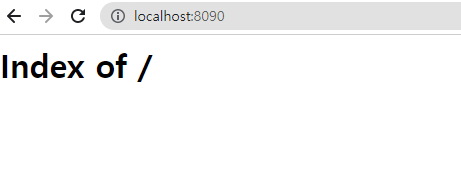

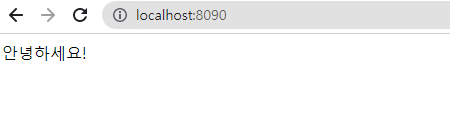

## 볼륨 마운트 실습

In [ ]:
# 마운트할 볼륨 생성
docker volume create apa000vol1

# 아파치 컨테이너 실행
docker run --name apa000ex21 -d -p 8091:80 -v apa000vol1:/usr/local/apache2/htdocs httpd

# 볼륨의 상세 정보 확인
docker volume inspect apa000vol1
docker container inspect apa000ex21

# 컨테이너, 이미지, 볼륨 삭제

## 성공 결과

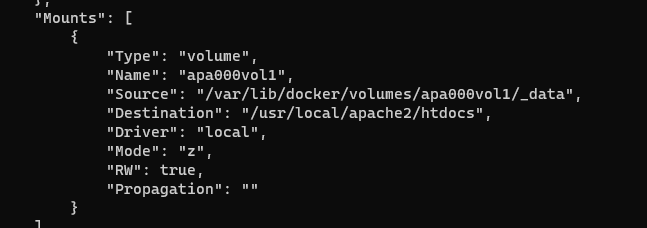

# 컨테이너로 이미지 만들기

- 이미 존재하는 컨테이너를 이용하면 누구나 쉽게 이미지를 만들 수 있음

**컨테이너를 만드는 방법**
1. commit 커맨드
2. Dockerfile 스크립트

**commit 커맨드**
- 컨테이너만 있으면 명령어 한 번으로 이미지 만들 수 있음
- 기존 컨테이너 복제 및 이동해야 할 때 편리
- docker commit 컨테이너_이름 새로운_이미지_이름

**Dockerfile 스크립트**
- Dockerfile은 이미지를 만드는 것밖에 할 수 없음 
- 실제 컨테이너 만들 필요 없음
- docker build -t 생성할_이미지_이름 재료_폴더_경로

**Dockerfile 스크립트 예**
- FROM 이미지_이름 : 토대가 되는 이미지를 지정
- COPY 원본_경로 대상_경로 : 이미지에 파일이나 폴더를 추가 
- RUN 리눅스_명령어 : 이미지를 빌드할 때 실행할 명령어 지정

**이미지를 옮기는 방법**
- 도커 레지스트리 통하거나 save 커맨드 사용해 tar 포맷으로 도커 엔진의 관리 영역 밖으로 내보내야 함
- docker save -o 파일_이름.tar 이미지_이름
- 파일을 다시 도커 엔진에 가져오려면 load 커맨드 사용

## commit 커맨드 실습

In [ ]:
# 아파치 컨테이너 준비 
docker run --name apa000ex22 -d -p 8092:80 httpd
    
# 컨테이너 변환한 새로운 이미지 생성
docker commit apa000ex22 ex22_original1

# 이미지 생성 확인
docker image ls

## 성공 결과

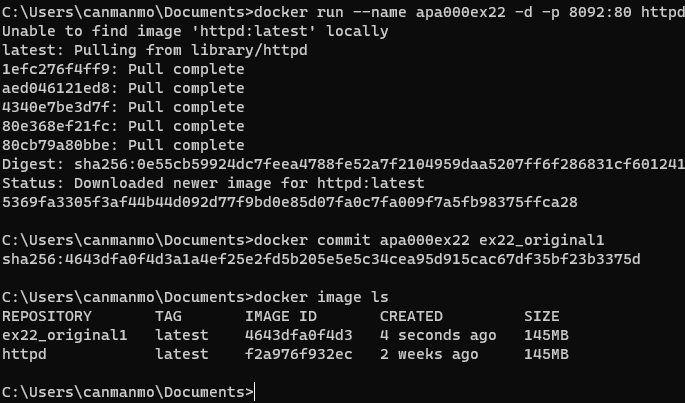

## Dockerfile 스크립트로 이미지 만들기

In [ ]:
# apa_folder 폴더 확인

# Dockerfile 스크립트 작성

# build 커맨드로 이미지 빌드
docker build -t ex22_original2 C:\Users\canmanmo\Documents\apa_folder\
    
# 이미지 생성 확인
docker image ls

# 해당 컨테이너 생성 및 실행해보고 초기 화면이 index.html 파일의 내용으로 바뀌었는지 확인하기
docker run --name apa000ex23 -d -p 8093:80 ex22_original2
http://localhost:8093

## 성공 결과

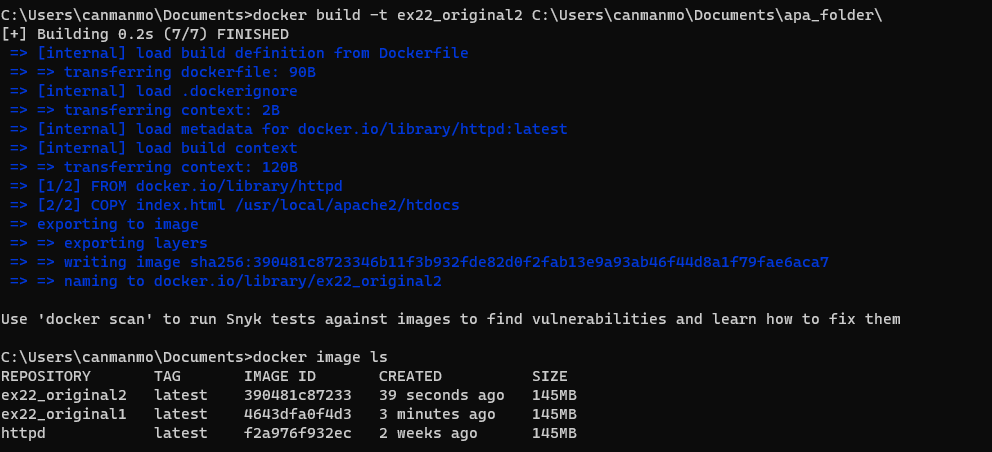

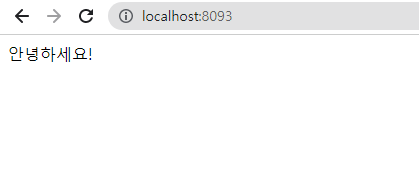